<a href="https://colab.research.google.com/github/prakashbhattgit/2020-CS109B/blob/master/Prakash_Bhatt_CompVision_Homework_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prakash Bhatt
### Computer Vision 
### Homework -05
### Prof Henstock, Prof Goh and Jayaraman Shivas  

---



Due Monday July 27, 2020 6pm EST
### Show your work (i.e. code) and provide brief explanations where appropriate
### Include your first and last name in the name of your ipynb notebook.
### If you have leveraged any resources, be sure to include their citation where they are used



# Set up

### **Environment**
Setup your environment as the following (your output may be different)

## Google import

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/'My Drive'/ColabHome/CompVision/Homework-05
!pwd
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive/ColabHome/CompVision/Homework-05
/gdrive/My Drive/ColabHome/CompVision/Homework-05
'Copy of HW5_for_students (1).ipynb'
'Copy of HW5_for_students.ipynb'
'Copy of Prakash Bhatt CompVision Homework-05.ipynb'
 HW4
 HW5
 HW5_Data.zip
 HW5_for_students.ipynb
 pickle
'Prakash Bhatt CompVision Homework-05.ipynb'


## Installations

In [ ]:
# !pip install tensorflow-gpu==2.0
# !pip install keras-lookahead
# !pip install keras-radam

In [ ]:
# !pip install keras-lookahead
# !pip install keras-radam

In [ ]:
!pip list |grep tensor

tensorboard              2.2.2          
tensorboard-plugin-wit   1.7.0          
tensorboardcolab         0.0.22         
tensorflow               2.2.0          
tensorflow-addons        0.8.3          
tensorflow-datasets      2.1.0          
tensorflow-estimator     2.2.0          
tensorflow-gcs-config    2.2.0          
tensorflow-gpu           2.2.0          
tensorflow-hub           0.8.0          
tensorflow-metadata      0.22.2         
tensorflow-privacy       0.2.2          
tensorflow-probability   0.10.0         


If you get a P100 or T4 GPU that's great. If it's K80... it will still work but it will be slow...

Transfer the .npy file to Google Drive, and then mount your Google Drive that contains the .npy file and use the following data loading settings
**Note:** For this part we are using the same .npy file as HW4

In [ ]:
import os
os.chdir("/content/drive/My Drive/")

Obviously your folder contents will be different, but make sure you see 'dc_10k_labels_128.npy' and 'dc_10k_photos_128.npy' in the list below.

In [ ]:
os.listdir()

I used the following imports, you don't "have to" use them, but it will be helpful. **Note that there are unused imports, you should not need to use every import to complete this homework.**

**WARNING: Using tensorflow.keras instead of keras may cause compatibility issues with the other packages we are using in this HW**

##Library imports

In [ ]:

# Imports
import os
import sys
import numpy as np
import pandas as pd
import cv2
import time
import json
from IPython.core.display import HTML
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

import tensorflow as tf
import tensorflow

import gc, sys
import numpy as np

import gc, sys
import numpy as np
import time

#import tensorflow

from matplotlib import pyplot as plt
from sklearn import model_selection
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model, Model, Input
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator

import pickle
import os 


# Imports
import os
import sys
import numpy as np
import pandas as pd
import cv2
import time
import json
from IPython.core.display import HTML
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile


from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


from tensorflow.keras import optimizers
from tensorflow.keras import losses

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from keras_radam import RAdam
from keras_lookahead import Lookahead

def newline(): 
    print('\n')


In [145]:
#import tensorflow_addons as tfa
#import tensorflow_addons.optimizers.RectifiedAdam as RAdam
#import tfa.optimizers.Lookahead as Lookahead
from keras_radam import RAdam
from keras_lookahead import Lookahead

def newline(): 
    print('\n')

**Note: In this HW, we intentionally make a very small (500-member) training dataset. We will be exploring how to train models when the training data is smaller than usual. The load_dataset function is NOT THE SAME as the one in HW4**

In [4]:
def load_dataset():
# load dataset
    npx = np.load('./HW4/dc_10k_photos_128.npy')
    npy = np.load('./HW4/dc_10k_labels_128.npy')
    X, X_test, y, y_test = model_selection.train_test_split(npx, npy, test_size=0.9, random_state=13)
    # garbage collection or run out of RAM
    npx = None
    npy = None
    gc.collect()
    X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.5, random_state=17)
    # one hot encode target values
    y_train = to_categorical(y_train)
    y_val = to_categorical(y_val)
    y_test = to_categorical(y_test)
    print(X_train.shape, X_val.shape, X_test.shape)
    print(y_train.shape, y_val.shape, y_test.shape)
    # convert from integers to floats
    X_train = X_train / 255.0
    X_val =  X_val / 255.0
    X_test = X_test / 255.0
    return X_train, y_train, X_val, y_val, X_test, y_test

# Load data

In [5]:
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()

(625, 128, 128, 3) (625, 128, 128, 3) (11250, 128, 128, 3)
(625, 2) (625, 2) (11250, 2)


In [9]:
print("Train image shape:",X_train.shape)
print("Test image shape:",X_test.shape)
print("Val image shape:",X_val.shape)

print("Train image shape:",y_train.shape)
print("Test image shape:",y_test.shape)
print("Val image shape:",y_val.shape)

Train image shape: (625, 128, 128, 3)
Test image shape: (11250, 128, 128, 3)
Val image shape: (625, 128, 128, 3)
Train image shape: (625, 2)
Test image shape: (11250, 2)
Val image shape: (625, 2)


In [10]:
dogcat2idx = {'dog':0, 'cat':1}
idx2dogcat = { 0:'dog', 1:'cat'}

# Show sample images

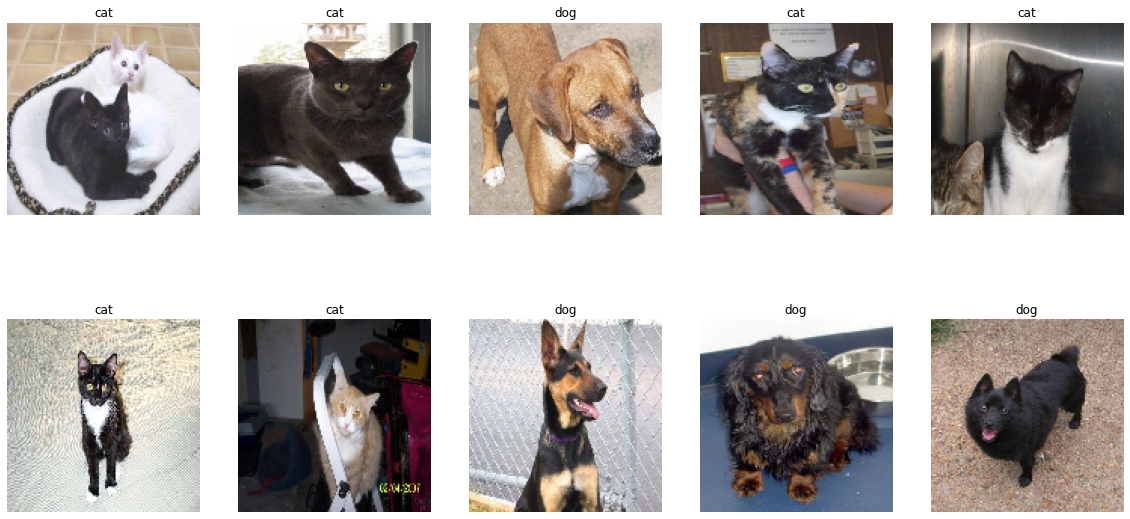

In [11]:
#%%script false --no-raise-error

# Plot sample 5x2 images
rand_five = np.random.randint(0,X_train.shape[0],size=10)

#print(rand_five)

# Plot the images

fig = plt.figure(figsize=(20,10))
for i,no in enumerate(rand_five):
    image = X_train[no]
    label = y_train[no]
    label =  idx2dogcat[np.argmax(label, axis=0)]
    axes = fig.add_subplot(2,5,i+1)
    axes.set_title(label)
    plt.imshow(image)
    plt.axis('off')

plt.show()

# Create utility functions

In [12]:
pickle_dir = os.path.join( os.curdir , 'pickle')
final_results_metrices = pickle_dir + '/homework05_metrices.json'

if not os.path.exists(pickle_dir): 
    os.mkdir(pickle_dir)

In [13]:
class JsonEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, decimal.Decimal):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(JsonEncoder, self).default(obj)
        
def get_model_metrics():
    with open(final_results_metrices) as json_file:
        model_metrics = json.load(json_file)
    
    return model_metrics

def save_model_metrics(model_name="model_1",metrics={}):
    if os.path.exists(final_results_metrices):
        with open(final_results_metrices) as json_file:
            model_metrics = json.load(json_file)
    else:
        model_metrics = {}
    
    model_metrics[model_name] = metrics
    
    # Save the json
    with open(final_results_metrices, 'w+') as json_file:
        json_file.write(json.dumps(model_metrics, cls=JsonEncoder))
        
# def save_model(path="models/section5b",model_name="model01"):

#     # Save the enitire model (structure + weights)
#     model.save(os.path.join(path,model_name+".hdf5"))

#     # Save only the weights
#     model.save_weights(os.path.join(path,model_name+".h5"))

#     # Save the structure only
#     model_json = model.to_json()
#     with open(os.path.join(path,model_name+".json"), "w") as json_file:
#         json_file.write(model_json)

# def get_model_size(path="models/section5b",model_name="model01"):
#     model_size = os.stat(os.path.join(path,model_name+".hdf5")).st_size
#     return model_size



In [44]:
def evaluate_plot_save_model(model,training_results,execution_time, test_data,test_label,learning_rate, batch_size, 
                        epochs, optimizer,save=True):
    
    # Get the model train history
    model_train_history = training_results.history
    # Get the number of epochs the training was run for
    num_epochs = len(model_train_history["loss"])
    # plot the results
    plot_model_results(training_results)

    # Evaluate on test data
    evaluation_results = model.evaluate(test_data,test_label)
    print(evaluation_results)
        
    if save:
        # Save model
        #save_model(model_name=model.name)
        
        #model_size = get_model_size(model_name=model.name)

        # Save model history
        # with open(os.path.join("models/section5b",model.name+"_train_history.json"), "w") as json_file:
        #     json_file.write(json.dumps(model_train_history,cls=JsonEncoder))

        trainable_parameters = model.count_params()

        # Save model metrics
        metrics ={
            "trainable_parameters":trainable_parameters,
            "execution_time":execution_time,
            "loss":evaluation_results[0],
            "accuracy":evaluation_results[1],
            "model_size":000,
            "learning_rate":learning_rate,
            "batch_size":batch_size,
            "epochs":epochs,
            "optimizer":type(optimizer).__name__
        }
        save_model_metrics(model_name=model.name,metrics=metrics)



In [15]:
def plot_model_results(training_results):
    
    # Get the model train history
    model_train_history = training_results.history
    # Get the number of epochs the training was run for
    num_epochs = len(model_train_history["loss"])

    # Plot training results
    fig = plt.figure(figsize=(15,5))
    axs = fig.add_subplot(1,2,1)
    axs.set_title('Loss')
    # Plot all metrics
    for metric in ["loss","val_loss"]:
        axs.plot(np.arange(0, num_epochs), model_train_history[metric], label=metric)
    axs.legend()
    
    axs = fig.add_subplot(1,2,2)
    axs.set_title('Accuracy')
    # Plot all metrics
    for metric in ["accuracy","val_accuracy"]:
        axs.plot(np.arange(0, num_epochs), model_train_history[metric], label=metric)
    axs.legend()

    plt.show()

In [16]:
def execute_compile_and_run_model(resnet_model,train_data_x, train_data_y,epochs,verbose, batch_size, val_step, 
                                   steps_per_epoch,callbacks):


    # Train model
    start_time = time.time()
    training_results = resnet_model.fit(
            train_data_x,
            train_data_y,
            validation_data=(X_val,y_val),
            batch_size=batch_size,
            epochs=epochs, 
            callbacks = callbacks,
            #callbacks = [es,mc],
            steps_per_epoch = steps_per_epoch,
            validation_steps = val_step,
            verbose=verbose)
    execution_time = (time.time() - start_time)/60.0
    print("Training execution time (mins)",execution_time)
    
    temp_results = resnet_model.evaluate(X_test)
    print(temp_results)

    return resnet_model, training_results, execution_time 




In [ ]:
## Show sample pictures


# **Homework (Part 1) Starts Here**

# **Q. Use a pretrained ResNet50V2 and train with the following specifications:**
*   **Hint:** Remember to freeze all other layers but the last one. If it is setup correctly, you should have 16,386 **trainable** parameters.
*   Use the Adam optimizer with default settings.
*   Use your discretion for other hyperparams (it should not matter that much)
*   Track the accuracy metrics during training.
*   Use early stopping (tracking validation accuracy, with patience of 10 epochs), and model checkpointing.
*   Do not use any data augmentation at this point in time.
*   Train for 50 epochs.


**When answering this question and all other questions in this homework, please contextualize your answers using the following results/analysis. Note that not all 3 analysis is needed for every question. Use your judgement to figure out which analysis are appropriate**
*   Plot the loss and metrics curve as means to track training/validation metrics. Comment on the extent of overfitting.
*   Comment on the number of epochs it took for the training to converge (assuming if it did converge at all).
*   Report on the final (or best) validation and test metrics of the model, and compare that to models trained in previous questions if appropriate.


### **Q1a (10 pts)**
*   Provide the relevant results/analysis from this initial training.

In [60]:
import keras

def build_and_compille_transfer_model(optimizer, learning_rate=.001):
    from tensorflow.keras.applications.resnet_v2 import ResNet50V2
    
    num_classes =2 
    from tensorflow.keras.applications.vgg16 import VGG16
    input_shape = (128,128,3)
    dog_cat_input = tf.keras.Input(shape=(128, 128, 3))

    resnet_model = VGG16(include_top=False,input_shape = input_shape,input_tensor=dog_cat_input)
    for layer in resnet_model.layers:
        layer.trainable = False
    flat1 = tf.keras.layers.Dropout(.5)(resnet_model.output)
    flat1 = tf.keras.layers.Flatten()(flat1)
    flat1 = tf.keras.layers.Dropout(.5)(flat1)
    # Thanks Shivas for helping 

    output = tf.keras.layers.Dense(num_classes, activation='softmax')(flat1)
    resnet_model = tf.keras.Model(inputs=resnet_model.inputs, outputs=output)
    # summarize

    #resnet_model.summary()
  

    loss = tf.keras.losses.categorical_crossentropy

    #optimizer 
    optimizer = tf.keras.optimizers.Adam(lr = learning_rate)
    # Compile
    resnet_model.compile(loss=loss,
                    optimizer=optimizer,
                    metrics=['accuracy'])
    return resnet_model

In [65]:
# Base parapers for Q7


## data params
image_height, image_width, num_channels = 128,128,3
input_shape = (image_height, image_width, num_channels)
num_classes =2

## model Params

learning_rate = 0.001

##run Paramars
batch_size = 16  
epochs = 50
val_step=10
steps_per_epoch =10
verbose =1
 
es = EarlyStopping(monitor='val_accuracy',patience=10)
mc = ModelCheckpoint(filepath =pickle_dir, monitor='val_accuracy',save_best_only=True, mode ='auto')
callbacks = [es,mc]

In [66]:

# Optimizer
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)

resnet_model = build_and_compille_transfer_model(optimizer,learning_rate)

In [67]:
resnet_model, training_results, execution_time =  execute_compile_and_run_model\
            (resnet_model,X_test,y_test,epochs,verbose, batch_size, val_step, 
                                   steps_per_epoch,callbacks)



Epoch 1/50
10/10 [==============================] - 3s 295ms/step - loss: 1.2026 - accuracy: 0.4938 - val_loss: 0.6288 - val_accuracy: 0.6375
Epoch 2/50
10/10 [==============================] - 2s 243ms/step - loss: 0.8845 - accuracy: 0.5875 - val_loss: 0.4629 - val_accuracy: 0.8188
Epoch 3/50
10/10 [==============================] - 0s 36ms/step - loss: 0.5813 - accuracy: 0.7250 - val_loss: 0.4125 - val_accuracy: 0.8062
Epoch 4/50
10/10 [==============================] - 2s 244ms/step - loss: 0.6342 - accuracy: 0.7437 - val_loss: 0.3716 - val_accuracy: 0.8375
Epoch 5/50
10/10 [==============================] - 2s 235ms/step - loss: 0.5220 - accuracy: 0.7625 - val_loss: 0.3484 - val_accuracy: 0.8625
Epoch 6/50
10/10 [==============================] - 0s 36ms/step - loss: 0.5287 - accuracy: 0.7563 - val_loss: 0.3424 - val_accuracy: 0.8500
Epoch 7/50
10/10 [==============================] - 0s 36ms/step - loss: 0.5183 - accuracy: 0.7563 - val_loss: 0.3401 - val_accuracy: 0.8500
Epoch 8/5

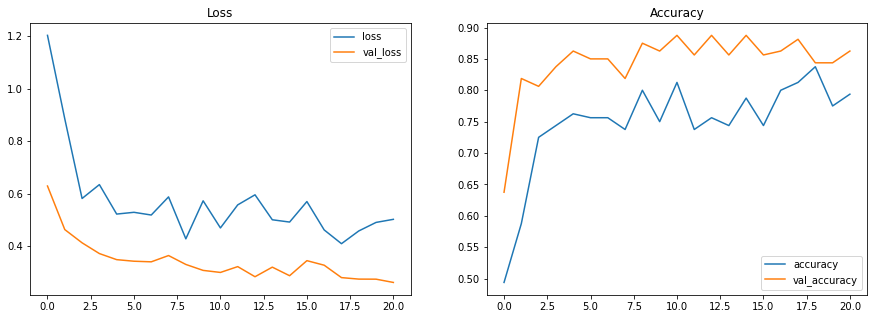

352/352 [==============================] - 10s 28ms/step - loss: 0.2930 - accuracy: 0.8731
[0.2930371165275574, 0.8730666637420654]


In [68]:
evaluate_plot_save_model(resnet_model,training_results,execution_time,X_test,y_test, learning_rate, batch_size, 
                        epochs, optimizer,save=True)

In [69]:
resnet_model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0  

## Observation 
>>> We have good results 

>>> we see some overfitting
>>> 

### attempt 4 

>>>  since the accuracy is down beucase we are training on the smaller dataset

>>> training on the larger dataset



Epoch 1/50
20/20 [==============================] - 1s 39ms/step - loss: 0.6929 - accuracy: 0.5156 - val_loss: 0.6926 - val_accuracy: 0.5250
Epoch 2/50
20/20 [==============================] - 1s 46ms/step - loss: 0.6927 - accuracy: 0.5246 - val_loss: 0.6925 - val_accuracy: 0.5250
Epoch 3/50
20/20 [==============================] - 1s 38ms/step - loss: 0.6926 - accuracy: 0.5219 - val_loss: 0.6925 - val_accuracy: 0.5250
Epoch 4/50
20/20 [==============================] - 1s 37ms/step - loss: 0.6927 - accuracy: 0.5180 - val_loss: 0.6925 - val_accuracy: 0.5250
Epoch 5/50
20/20 [==============================] - 1s 38ms/step - loss: 0.6939 - accuracy: 0.4750 - val_loss: 0.6927 - val_accuracy: 0.5250
Epoch 6/50
20/20 [==============================] - 1s 38ms/step - loss: 0.6917 - accuracy: 0.5672 - val_loss: 0.6925 - val_accuracy: 0.5250
Epoch 7/50
20/20 [==============================] - 1s 38ms/step - loss: 0.6924 - accuracy: 0.5312 - val_loss: 0.6925 - val_accuracy: 0.5250
Epoch 8/50
20

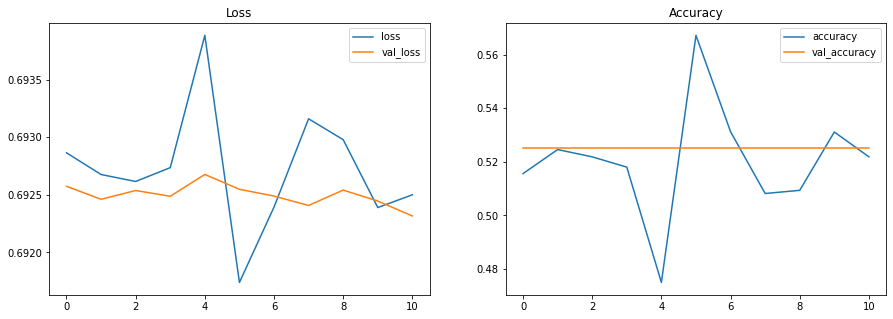

352/352 [==============================] - 10s 28ms/step - loss: 0.6932 - accuracy: 0.5034
[0.6932262778282166, 0.5033777952194214]


In [114]:
#---
resnet_model, training_results, execution_time =  execute_compile_and_run_model\
            (resnet_model,X_train,y_train,epochs,verbose, batch_size, val_step, 
                                   steps_per_epoch,callbacks)

#---

evaluate_plot_save_model(resnet_model,training_results,execution_time,X_test,y_test, learning_rate, batch_size, 
                        epochs, optimizer,save=True)

>>> There is no overfitting but the perforamance is low becuase of the training data is small and traiable layers are many. 

>>> number of epoch is not going to make difference as early stopping is happening around 10 epochs

>>> I also see the validation accuracy is not increasing that means that data is trained in smaller dataset

## **Q1b (10 pts)**
*   Repeat Q1a, but this time also unfreeze the last ResNet block.
*   **Hint:** You should have 15,036,418 trainable params
*   Provide the relevant results/analysis.
*   Why is the accuracy much worse in this situation compared to Q1a?

In [85]:
import keras

def build_and_compille_transfer_model_unfreeze(optimizer, unfreeze_layer=4, learning_rate=.001):
    from tensorflow.keras.applications.resnet_v2 import ResNet50V2
    
    num_classes =2 
    from tensorflow.keras.applications.vgg16 import VGG16
    input_shape = (128,128,3)
    dog_cat_input = tf.keras.Input(shape=(128, 128, 3))

    resnet_model = VGG16(include_top=False,input_shape = input_shape,input_tensor=dog_cat_input)

    for layer in resnet_model.layers[:-unfreeze_layer]:
        layer.trainable = False
        print(layer.name, layer.trainable)

    for layer in resnet_model.layers[-unfreeze_layer:]:
        layer.trainable = True
        print(layer.name, layer.trainable)

    flat1 = tf.keras.layers.Dropout(.5)(resnet_model.output)
    flat1 = tf.keras.layers.Flatten()(flat1)
    flat1 = tf.keras.layers.Dropout(.5)(flat1)
    # Thanks Shivas for helping 

    output = tf.keras.layers.Dense(num_classes, activation='softmax')(flat1)
    resnet_model = tf.keras.Model(inputs=resnet_model.inputs, outputs=output)
    # summarize

    resnet_model.summary()
  

    loss = tf.keras.losses.categorical_crossentropy

    #optimizer 
    optimizer = tf.keras.optimizers.Adam(lr = learning_rate)
    # Compile
    resnet_model.compile(loss=loss,
                    optimizer=optimizer,
                    metrics=['accuracy'])
    return resnet_model

In [104]:
## data params
image_height, image_width, num_channels = 128,128,3
input_shape = (image_height, image_width, num_channels)
num_classes =2
unfreeze_layer =4

## model Params

learning_rate = 0.001

##run Paramars
batch_size = 16  
epochs = 50
val_step=20
steps_per_epoch =20
verbose =1
 
es = EarlyStopping(monitor='val_accuracy',patience=10)
mc = ModelCheckpoint(filepath =pickle_dir, monitor='val_accuracy',save_best_only=True, mode ='auto')
callbacks = [es,mc]


In [105]:
# Optimizer
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)

resnet_model = build_and_compille_transfer_model_unfreeze(optimizer,unfreeze_layer , learning_rate)


input_22 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True
Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
________________________________________

In [108]:
   for i, layer in enumerate(resnet_model.layers):
        print(f'{i}.2f   {layer.name} {layer.trainable}')

0.2f   input_22 False
1.2f   block1_conv1 False
2.2f   block1_conv2 False
3.2f   block1_pool False
4.2f   block2_conv1 False
5.2f   block2_conv2 False
6.2f   block2_pool False
7.2f   block3_conv1 False
8.2f   block3_conv2 False
9.2f   block3_conv3 False
10.2f   block3_pool False
11.2f   block4_conv1 False
12.2f   block4_conv2 False
13.2f   block4_conv3 False
14.2f   block4_pool False
15.2f   block5_conv1 True
16.2f   block5_conv2 True
17.2f   block5_conv3 True
18.2f   block5_pool True
19.2f   dropout_38 True
20.2f   flatten_19 True
21.2f   dropout_39 True
22.2f   dense_21 True


Epoch 1/50
10/10 [==============================] - 3s 335ms/step - loss: 1.5761 - accuracy: 0.5188 - val_loss: 0.6933 - val_accuracy: 0.5125
Epoch 2/50
10/10 [==============================] - 0s 47ms/step - loss: 0.7788 - accuracy: 0.5813 - val_loss: 0.6971 - val_accuracy: 0.5063
Epoch 3/50
10/10 [==============================] - 0s 46ms/step - loss: 0.7912 - accuracy: 0.4750 - val_loss: 0.6944 - val_accuracy: 0.4875
Epoch 4/50
10/10 [==============================] - 4s 415ms/step - loss: 0.7003 - accuracy: 0.4750 - val_loss: 0.6942 - val_accuracy: 0.5188
Epoch 5/50
10/10 [==============================] - 0s 46ms/step - loss: 0.7112 - accuracy: 0.4500 - val_loss: 0.6924 - val_accuracy: 0.5063
Epoch 6/50
10/10 [==============================] - 3s 289ms/step - loss: 0.7177 - accuracy: 0.4313 - val_loss: 0.6909 - val_accuracy: 0.5437
Epoch 7/50
10/10 [==============================] - 0s 46ms/step - loss: 0.7048 - accuracy: 0.5125 - val_loss: 0.6932 - val_accuracy: 0.4938
Epoch 8/50

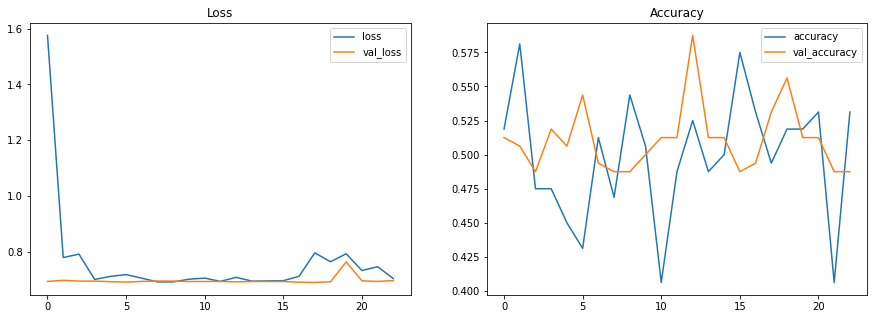

352/352 [==============================] - 10s 28ms/step - loss: 0.6952 - accuracy: 0.4958
[0.6952378749847412, 0.4958222210407257]


In [95]:
#----
resnet_model, training_results, execution_time =  execute_compile_and_run_model\
            (resnet_model,X_test,y_test,epochs,verbose, batch_size, val_step, 
                                   steps_per_epoch,callbacks)

#---

evaluate_plot_save_model(resnet_model,training_results,execution_time,X_test,y_test, learning_rate, batch_size, 
                        epochs, optimizer,save=True)

### attempt 2

input_23 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True
Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
________________________________________

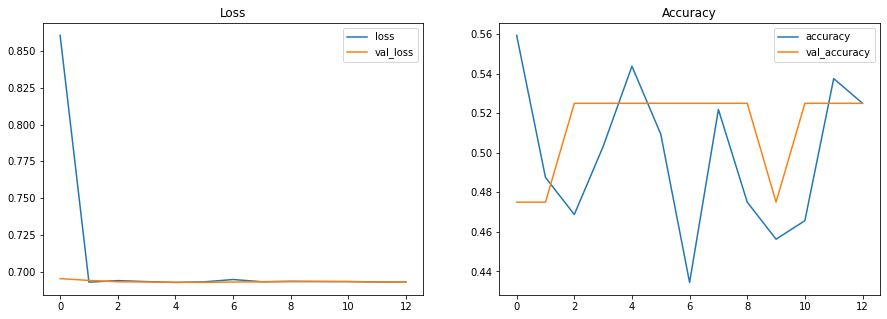

352/352 [==============================] - 10s 28ms/step - loss: 0.6931 - accuracy: 0.5034
[0.693126916885376, 0.5033777952194214]


In [112]:
## data params
image_height, image_width, num_channels = 128,128,3
input_shape = (image_height, image_width, num_channels)
num_classes =2

## model Params

learning_rate = 0.001

##run Paramars
batch_size = 16  
epochs = 50
val_step=20
steps_per_epoch =20
verbose =1
 
es = EarlyStopping(monitor='val_accuracy',patience=10)
mc = ModelCheckpoint(filepath =pickle_dir, monitor='val_accuracy',save_best_only=True, mode ='auto')
callbacks = [es,mc]

###----

# model build
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)

resnet_model = build_and_compille_transfer_model_unfreeze(optimizer,unfreeze_layer , learning_rate)

##---fit
resnet_model, training_results, execution_time =  execute_compile_and_run_model\
            (resnet_model,X_test,y_test,epochs,verbose, batch_size, val_step, 
                                   steps_per_epoch,callbacks)

#---evaluate 

evaluate_plot_save_model(resnet_model,training_results,execution_time,X_test,y_test, learning_rate, batch_size, 
                        epochs, optimizer,save=True)

### Observations
>>> I change valication sets and steps per epoch 

>>> Beucase of this the learning is smooth 

>>> otherwise my curve was very zig zag. 

##**Q1c (10 pts)**
*   Repeat Q1b, but this time use the following data augmentation settings: random rotation (20 degrees), random shift height (by 0.1), random shift width (by 0.1), random shearing (10 degrees), random zooming in and out (by 10%) vertical and horizontal flips.
*   **Hint:** There should be the same number of trainable params as in Q1b
*   Provide the relevant results/analysis.
*   Explain the observed benefits and/or tradeoffs of using data augmentation compared to Q1b.
*   Is your results significantly better than that of Q1a? Can you explain why?
*   **Hint:** We are classifying cats vs dogs in this homework. What was the dataset for which the ResNet50V2 model was trained on?

### Making dataset for the ImageGenerator

In [116]:

## data params
image_height, image_width, num_channels = 128,128,3
input_shape = (image_height, image_width, num_channels)
num_classes =2

## model Params

learning_rate = 0.001

##run Paramars
batch_size = 32  
epochs = 50
val_step=10
steps_per_epoch =10
verbose =1
 
es = EarlyStopping(monitor='val_accuracy',patience=10)
mc = ModelCheckpoint(filepath =pickle_dir, monitor='val_accuracy',save_best_only=True, mode ='auto')
callbacks = [es,mc]

In [121]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1, 
    shear_range =10,
    zoom_range = 10,
    horizontal_flip=True # horizental flip
)

# Initializing the image generator 
test_datagen  = ImageDataGenerator()

# generating train and validation images 

train_ds = train_datagen.flow(
  X_train,y_train,
  batch_size=batch_size)
val_ds = train_datagen.flow(
  X_val,y_val,
  batch_size=batch_size)
test_ds = test_datagen.flow(
    X_test,y_test,
  batch_size=batch_size)

In [142]:
def execute_compile_and_run_model_generator(resnet_model,train_data_x, train_data_y,epochs,verbose, batch_size, val_step, 
                                   steps_per_epoch,callbacks,generator = None):


    # Train model
    start_time = time.time()

    if not generator: 

        training_results = resnet_model.fit(
                train_data_x,
                train_data_y,
                validation_data=(X_val,y_val),
                batch_size=batch_size,
                epochs=epochs, 
                callbacks = callbacks,
                #callbacks = [es,mc],
                steps_per_epoch = steps_per_epoch,
                validation_steps = val_step,
                verbose=verbose)
    else:
        training_results = resnet_model.fit_generator(
        train_datagen.flow( X_train, y_train,batch_size = batch_size),
        validation_data=train_datagen.flow(X_val,y_val),
        #batch_size = batch_size,
        steps_per_epoch=steps_per_epoch,
        epochs = epochs,
        callbacks = [es,mc]
         ) 
    
    execution_time = (time.time() - start_time)/60.0
    print("Training execution time (mins)",execution_time)
    
    temp_results = resnet_model.evaluate(X_test)
    print(temp_results)

    return resnet_model, training_results, execution_time 




input_32 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True
Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
________________________________________

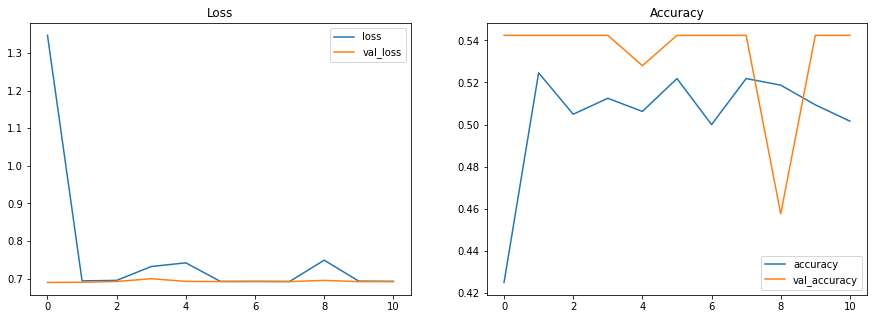

352/352 [==============================] - 10s 28ms/step - loss: 0.6931 - accuracy: 0.5034
[0.6931284070014954, 0.5033777952194214]


In [143]:

# Optimizer
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)

resnet_model = build_and_compille_transfer_model_unfreeze(optimizer,unfreeze_layer, learning_rate)

# ---fit
resnet_model, training_results, execution_time = execute_compile_and_run_model_generator (resnet_model,
                                    X_test, y_test,epochs,
                                    verbose, batch_size, val_step, 
                                   steps_per_epoch,callbacks,generator = True)
 

# ---evalaute 

evaluate_plot_save_model(resnet_model,training_results,execution_time,X_test,y_test, learning_rate, batch_size, 
                        epochs, optimizer,save=True)

### Observations

>>> I will have to work on the training accuracy and validation accuracy 

>>> it is not comping right 

>>> test accuracy and validation accuracy did not increase even though the loss is very low

## **Q1d (10 pts)**
*   Repeat Q1c, but this time use a novel optimizer (pick any 1 of the 3: RAdam, Lookahead, Ranger). For Lookahead/Ranger, increase the early stopping settings to wait for 30 epochs.
*   **Hint:** There should be the same number of trainable params as in Q1b
*   **FYI:** I've noticed that when training with the Lookahead/Ranger optimizer it gets "hung/frozen" at the beginning, but eventually the model starts training.
*   Provide the relevant results/analysis.
*   Are you observing any substantial improvement of using these novel optimizers compared to Adam (i.e. Q1c)?
*   Considering only Q1c and Q1d, what other factors can lead to perceived accuracy improvements?
*   **Hint:** If we re-run Q1c another time, will we get exactly the same accuracy?

>>> ***Carrying all the parameters from ***

In [153]:

## data params
image_height, image_width, num_channels = 128,128,3
input_shape = (image_height, image_width, num_channels)
num_classes =2
unfreeze_layer=0
## model Params

learning_rate = 0.001

##run Paramars
batch_size = 32 
epochs = 100#
val_step=30
steps_per_epoch =30
verbose =1
 
es = EarlyStopping(monitor='val_accuracy',patience=30)
mc = ModelCheckpoint(filepath =pickle_dir, monitor='val_accuracy',save_best_only=True, mode ='auto')
callbacks = [es,mc]



input_36 True
block1_conv1 True
block1_conv2 True
block1_pool True
block2_conv1 True
block2_conv2 True
block2_pool True
block3_conv1 True
block3_conv2 True
block3_conv3 True
block3_pool True
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True
Model: "model_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_______________________________________________________

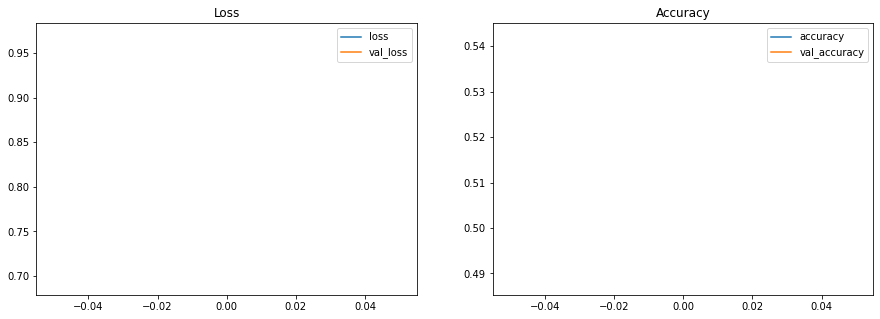

352/352 [==============================] - 10s 28ms/step - loss: 0.6931 - accuracy: 0.5034
[0.6931256651878357, 0.5033777952194214]


In [154]:
#optimizer = RAdam(total_steps=5000, warmup_proportion=0.1, min_lr=1e-5)
optimizer=Lookahead(RAdam(total_steps=10000, warmup_proportion=0.1, min_lr=1e-5))

resnet_model = build_and_compille_transfer_model_unfreeze(optimizer,unfreeze_layer, learning_rate)

# ---fit
resnet_model, training_results, execution_time = execute_compile_and_run_model_generator (resnet_model,
                                    X_test, y_test,epochs,
                                    verbose, batch_size, val_step, 
                                   steps_per_epoch,callbacks,generator = True)
 

# ---evalaute 

evaluate_plot_save_model(resnet_model,training_results,execution_time,X_test,y_test, learning_rate, batch_size, 
                        epochs, optimizer,save=True)

### Observation 
>>> I need to interpret the results... ....

### Observations 

>>> The training and validation resutls are not optimal 

>>> too much of randomness in training accuracy

# **Next Homework Section on Image Segmentation**

In [156]:
# Garbage collection to force free up RAM else will crash Colab
X_train=None
y_train=None
X_val=None
y_val=None
X_test=None
y_test=None
model=None
history=None
gc.collect()

92261

### **Environment**
Setup your environment as the following (your output may be different)

In [155]:
#!pip install tensorflow-gpu==1.15.0
!pip install keras-unet
#!pip install keras-lookahead
!#pip install keras-radam

In case you were wondering, this is how the dataset was generated (you do not need to run this part)

In [ ]:
# # Get files and masks

# masks = glob.glob("whales/*.png")
# orgs = list(map(lambda x: x.replace(".png", ".jpg"), masks))

# # Resize image

# imgs_list = []
# masks_list = []
# for image, mask in zip(orgs, masks):
#     imgs_list.append(np.array(Image.open(image).resize((256,256))))
#     masks_list.append(np.array(Image.open(mask).resize((256,256))))

# imgs_np = np.asarray(imgs_list)
# masks_np = np.asarray(masks_list)
# print(imgs_np.shape, masks_np.shape)

In [ ]:
# # Normalize data
# print(imgs_np.max(), masks_np.max())
# x = np.asarray(imgs_np, dtype=np.float32)/255
# y = np.asarray(masks_np, dtype=np.float32)
# print(x.max(), y.max())
# print(x.shape, y.shape)
# y = y.reshape(y.shape[0], y.shape[1], y.shape[2], 1)
# print(x.shape, y.shape)

In [ ]:
# # Save data
# np.save('whaleseg_photos_256.npy', x)
# np.save('whaleseg_labels_256.npy', y)

The visualization below is for reference only (you do not need to run this part)

-----------------------------------------
keras-unet init: TF version is < 2.0.0 or not present - using `Keras` instead of `tf.keras`
-----------------------------------------


Using TensorFlow backend.


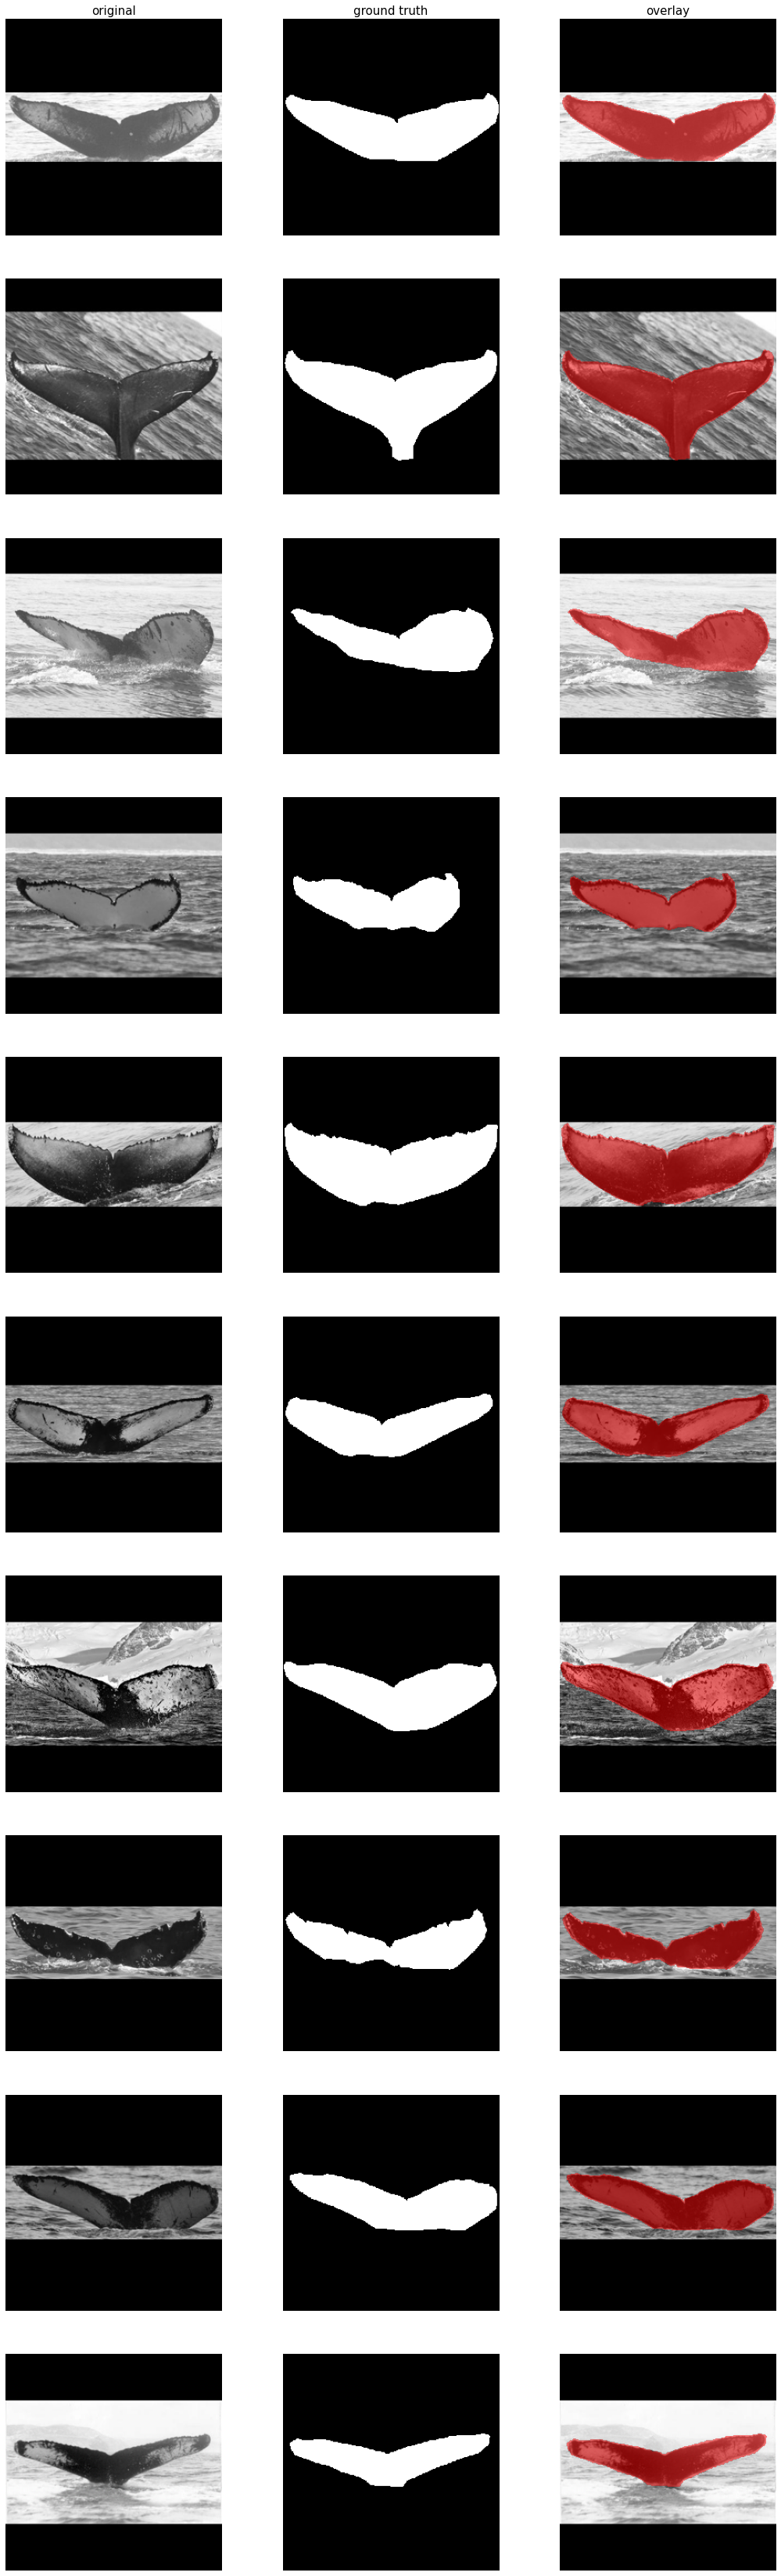

In [ ]:
# from keras_unet.utils import plot_imgs

# plot_imgs(org_imgs=imgs_np, mask_imgs=masks_np, nm_img_to_plot=10, figsize=6)

Transfer the .npy file to Google Drive, and then mount your Google Drive that contains the .npy file and use the following data loading settings

### **Loading Data**


I used the following imports, you don't "have to" use them, but it will be helpful. **Note that there are unused imports, you should not need to use every import to complete this homework.**

**WARNING: Using tensorflow.keras instead of keras may cause compatibility issues with the other packages we are using in this HW**

In [157]:
import gc
import numpy as np
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras_radam import RAdam
from keras_lookahead import Lookahead
from keras_unet.models import custom_unet
from keras_unet.metrics import iou, iou_thresholded
from keras_unet.losses import jaccard_distance
from keras_unet.utils import get_augmented, plot_imgs, plot_segm_history

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


Use the following commands to load the numpy array containing the segmentation data and labels (images and masks), do not change it.

In [166]:
def load_dataset_p2():
    # load dataset
    npx = np.load('./HW5/whaleseg_photos_256.npy')
    npy = np.load('./HW5/whaleseg_labels_256.npy')

    X, X_test, y, y_test = train_test_split(npx, npy, test_size=0.15, random_state=13)
    # garbage collection or run out of RAM
    npx = None
    npy = None
    gc.collect()
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=17)

    print(X_train.shape, X_val.shape, X_test.shape)
    print(y_train.shape, y_val.shape, y_test.shape)

    X_train = X_train/255
    X_teat = X_test/255
    X_val = X_val/255

    return X_train, y_train, X_val, y_val, X_test, y_test

In [167]:
# Yes, this dataset is very small!!!
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset_p2()

(100, 256, 256, 3) (25, 256, 256, 3) (23, 256, 256, 3)
(100, 256, 256, 1) (25, 256, 256, 1) (23, 256, 256, 1)


In [ ]:
X_train[1]

# **Q. Setup a "custom U-Net" and train with the following specifications:**
*   For the encoder part: 3 conv layers with 32 filters per layer, the decoder part will be symmetrical by definition. Use the default filter size and stride settings.
*   Use Batch Normalization, do not use Dropout.
*   Use the Adam optimizer with default settings.
*   Use the binary cross-entropy loss.
*   Use the following data augmentation settings: random rotation (20 degrees), random shift height (by 0.05), random shift width (by 0.05), random shearing (20 degrees), vertical and horizontal flips.
*   Track the IOU and thresholded IOU metrics during training (this is in the keras-unet package).
*   Use early stopping (tracking validation loss, with patience of 10 epochs), and model checkpointing.
*   Train for 100 epochs.
*   Hint: You should have 7,768,929 parameters


**When answering this question and all other questions in this homework, please contextualize your answers using the following results/analysis. Note that not all 3 analysis is needed for every question. Use your judgement to figure out which analysis are appropriate**
*   Plot the loss and metrics curve as means to track training/validation metrics. Comment on the extent of overfitting.
*   Comment on the number of epochs it took for the training to converge (assuming if it did converge at all).
*   Report on the final (or best) validation and test metrics of the model, and compare that to models trained in previous questions if appropriate.



In [179]:
def build_and_compile_unet(optimizer, learning_rate):
    
# Build U-Net model
    inputs = keras.models.Input((256, 256, 3))

    c1 = keras.layers.Conv2D(32, (3, 3), activation='relu',  padding='same') (inputs)
    #c1 = keras.layers.MaxPooling2D(2,2)(c1)
    c1 = keras.layers.BatchNormalization()(c1)

    c2 = keras.layers.Conv2D(32*2, (3, 3), activation='relu',  padding='same') (c1)
    #c2 = keras.layers.MaxPooling2D(2,2)(c2)
    c2 = keras.layers.BatchNormalization()(c2)

    c3 = keras.layers.Conv2D(32*4, (3, 3), activation='relu',  padding='same') (c2)
    #c3 = keras.layers.MaxPooling2D(2,2)(c3)
    c3 = keras.layers.BatchNormalization()(c3)

    cm = keras.layers.Conv2D(32*8, (3, 3), activation="relu", padding="same")(c3)
    cm = keras.layers.Conv2D(32*8, (3, 3), activation="relu", padding="same")(cm)    
 
    # 
    d3 =  keras.layers.Conv2DTranspose(32 * 4, (3, 3),  padding="same")(cm)
    uc3 = keras.layers.concatenate([d3, c3])
    uc3 = keras.layers.BatchNormalization()(uc3)

    d2 =  keras.layers.Conv2DTranspose(32 * 2, (3, 3),  padding="same")(d3)
    uc2 = keras.layers.concatenate([d2, c2])
    uc2 = keras.layers.BatchNormalization()(uc2)

    d1 =  keras.layers.Conv2DTranspose(32 * 1, (3, 3),  padding="same")(d2)
    uc1 = keras.layers.concatenate([d1, c1])
    uc1 = keras.layers.BatchNormalization()(uc1)

    outputs = keras.layers.Conv2D(1, (1,1), padding="same", activation="sigmoid")(uc1)
    
    model = Model(inputs=[inputs], outputs=[outputs])

    model.summary()


    loss = tf.keras.losses.binary_crossentropy

    #optimizer 
    optimizer = tf.keras.optimizers.Adam(lr = learning_rate)
    # Compile
    model.compile(loss=loss,
                    optimizer=optimizer,
                    metrics=['accuracy'])
    
    
    return model

In [180]:
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)

unet_model = build_and_compile_unet(optimizer, learning_rate)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_43 (InputLayer)           (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 256, 256, 32) 896         input_43[0][0]                   
__________________________________________________________________________________________________
batch_normalization_18 (BatchNo (None, 256, 256, 32) 128         conv2d_21[0][0]                  
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 256, 256, 64) 18496       batch_normalization_18[0][0]     
____________________________________________________________________________________________

In [ ]:


# ---fit
unet_model, training_results, execution_time = execute_compile_and_run_model_generator (resnet_model,
                                    X_test, y_test,epochs,
                                    verbose, batch_size, val_step, 
                                   steps_per_epoch,callbacks,generator = True)
 

# ---evalaute 

evaluate_plot_save_model(unet_model,training_results,execution_time,X_test,y_test, learning_rate, batch_size, 
                        epochs, optimizer,save=True)

### **Q2a (15 pts)**
*   Provide some visualization as to how the images look like after data augmentation
*   **Hint:** keras-unet package has some utility functions for visualization!
*   Provide the relevant results/analysis from this initial training.
*   Explain what is the difference between the IOU vs thresholded IOU metrics used in this work.



### **Q2b (10 pts)**
*   Repeat Q2a but switch the loss from binary cross-entropy to jaccard distance.
*   **Hint:** keras-unet package has some other loss functions that you may find useful!
*   Provide the relevant results/analysis.
*   Do you get any significant change in performance metrics (>0.1 difference) when using jaccard distance in this scenario? Can you explain why?

### **Q3 (30 pts)**
*   Using the best results in Q2 as a new baseline, see if you can train a more accurate model without using more data.
*   The two runs from Q2 "have issues" associated with them. Can you spot what is "wrong" with the training even though the IOU metrics are reasonably good?
*   Try at least **3 different** ways to train a more accurate model, and find at least **1 approach** that outperforms the baseline (either IOU or thresholded IOU will be acceptable metrics to compare against).
*   **Hint:** Any option is on the table. Think about what is wrong the the loss/metric curves from Q2.
*   **Warning:** Each of the 3 attempts must be different from one another. For example, if you found that wider U-Nets work better, the 3 attempts cannot be wider U-Nets of 100, 120, and 140 filters.
*   **Summarize your findings!** Also, document all your trials and experimentations.

### **Q4 (5 pts)**
*   How much time did you spend on this HW?